<h1>ITIT-4103-2021</h1>
<h3>Assignment 6</h3>

- **Name**: Aastha Jain
- **Roll No**: 2018IMT-004
- **Course**: Machine Learning Lab
- **Course Code**: ITIT-4107-2021

# Preparation

## Library Imports

In [53]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading

In [7]:
from sklearn.datasets import load_iris
iris_data = load_iris()

X=iris_data.data
Y=iris_data.target

df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

## Data Description

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'Sepal Description')

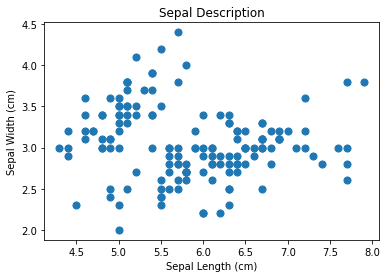

In [10]:
df = np.array(df)

# Data Sepal Visualization
plt.scatter(df[:, 0], df[:, 1], s=50)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Description")

Text(0.5, 1.0, 'Petal Description')

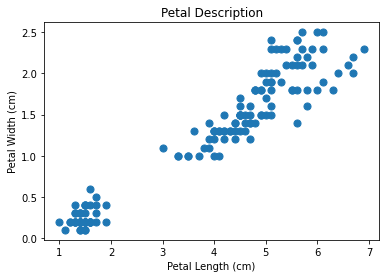

In [5]:
# Data Petal Visualization
plt.scatter(df[:, 2], df[:, 3], s=50)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Description")

# Data Clustering

## Elbow method

In [12]:
wcss = []

for i in range(1, 11):
    clusters = KMeans(n_clusters = i, init = 'k-means++', random_state = 24)
    clusters.fit(df)
    wcss.append(clusters.inertia_)

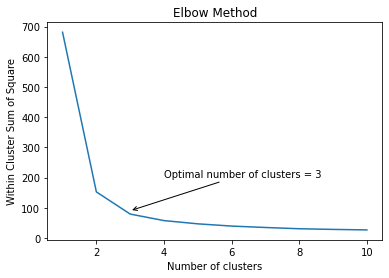

In [27]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Square')
plt.annotate("Optimal number of clusters = 3", xy=(3,90), xytext=(4, 200), arrowprops=dict(arrowstyle="->"))
plt.show()

In [32]:
clusters = KMeans(n_clusters = 3, init = 'k-means++', random_state = 24)
y_kmeans = clusters.fit_predict(df)

In [31]:
from sklearn.metrics import accuracy_score
print(f'The accuracy of K-Mean model is: {accuracy_score(Y,y_kmeans)*100}%')

The accuracy of K-Mean model is: 24.0%


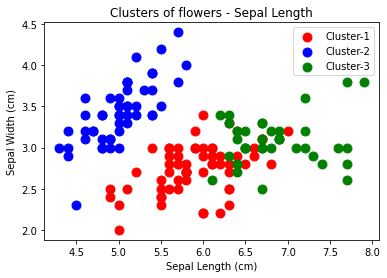

In [49]:
plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s = 80, c = 'red', label = 'Cluster-1')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s = 80, c = 'blue', label = 'Cluster-2')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Cluster-3')

plt.title('Clusters of flowers - Sepal Length')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

plt.legend()
plt.show()

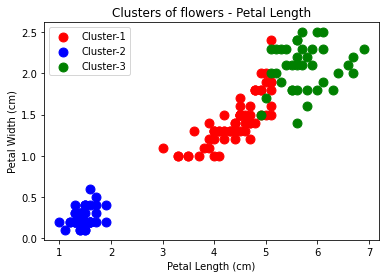

In [48]:
plt.scatter(df[y_kmeans == 0, 2], df[y_kmeans == 0, 3], s = 80, c = 'red', label = 'Cluster-1')
plt.scatter(df[y_kmeans == 1, 2], df[y_kmeans == 1, 3], s = 80, c = 'blue', label = 'Cluster-2')
plt.scatter(df[y_kmeans == 2, 2], df[y_kmeans == 2, 3], s = 80, c = 'green', label = 'Cluster-3')

plt.title('Clusters of flowers - Petal Length')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

plt.legend()
plt.show()

## PCA

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
dfs = pca.fit_transform(df)
explained_variance = pca.explained_variance_ratio_

## K-Means with PCA

In [37]:
wcss_p = []
for i in range(1, 11):
    clusters = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    clusters.fit(dfs)
    wcss_p.append(clusters.inertia_)

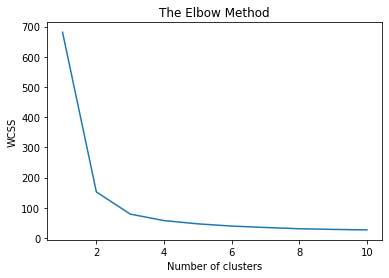

In [38]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
clusters_p = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_p= clusters_p.fit_predict(dfs)

In [41]:
print(f'The accuracy of K-Mean model with PCA is: {accuracy_score(Y,y_kmeans_p)*100}%')

The accuracy of K-Mean model with PCA is: 88.66666666666667%


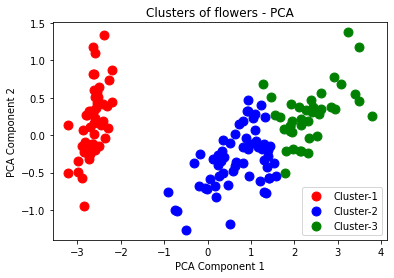

In [47]:
plt.scatter(dfs[y_kmeans_p == 0, 0], dfs[y_kmeans_p == 0, 1], s = 80, c = 'red', label = 'Cluster-1')
plt.scatter(dfs[y_kmeans_p == 1, 0], dfs[y_kmeans_p == 1, 1], s = 80, c = 'blue', label = 'Cluster-2')
plt.scatter(dfs[y_kmeans_p == 2, 0], dfs[y_kmeans_p == 2, 1], s = 80, c = 'green', label = 'Cluster-3')

plt.title('Clusters of flowers - PCA')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.legend()
plt.show()

# EM Algorithm

In [52]:
X,Y = shuffle(X,Y)

em_model=GaussianMixture(n_components=3,random_state=42)
em_model.fit(X)

y_em= em_model.predict(X)
print(f'The accuracy of EM model is: {accuracy_score(Y,y_em)*100}%')

The accuracy of EM model is: 36.666666666666664%


# EM Algorithm with PCA

In [54]:
pca = PCA(n_components=2)

X_p = pca.fit_transform(X)
pca_em_model=GaussianMixture(n_components=3,random_state=3425)
pca_em_model.fit(X_p)

res= pca_em_model.predict(X_p)
print(f'The accuracy of EM model is: {accuracy_score(Y,res)*100}%')

The accuracy of EM model is: 98.0%


# Results

### Accuracy of K-means and EM models
1.   **K-Mean model**: 24 %
2.   **EM model**: 33.33333333333333 %

### Accuracy of K-means and EM models with PCA
1.   **K-Mean model with PCA**: 88.66666666666667 %
2.   **EM model with PCA**: 98 %